# Load Dataset

In [1]:
!pip install kaggle

Upload kaggle API key (kaggle.json)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                        title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance       Student Habits vs Academic Performance               19512  2025-04-12 10:49:08.663000          12040        219  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid    Heart Attack Dataset                                 16250  2025-04-30 21:58:22.740000           1229         24  1.0              
adilshamim8/predict-students-dropout-and-academic-success  Student Dropout & Success Prediction Dataset        106181  2025-04-23 06:34:06.433000           1214         27  1.0              
rameezmeerasahib/electric-vehicle-ev-sales-an

In [5]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other


In [6]:
!unzip credit-card-fraud-detection-dataset-2023.zip

Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_2023.csv     


Load dataset

In [29]:
import pandas as pd

df = pd.read_csv('creditcard_2023.csv')
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

Check for null values

In [30]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [31]:
print(df['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


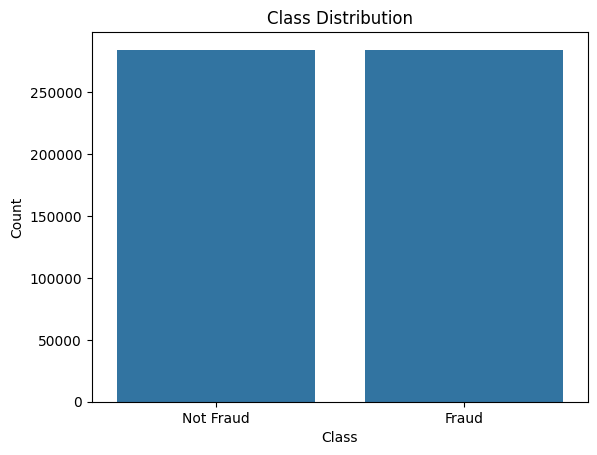

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = df.copy()  # Avoid modifying the original DataFrame
df_temp['Class_Label'] = df_temp['Class'].map({0: 'Not Fraud', 1: 'Fraud'})

# Plot the countplot using the temporary column
sns.countplot(x='Class_Label', data=df_temp)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Data PreProcessing

In [34]:
df.sample(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283612,283612,1.272107,-0.890026,0.132132,-0.625740,0.111466,0.676485,0.324893,-0.139952,1.103358,...,0.047872,0.633758,-0.123117,0.619179,-0.463323,0.109519,-0.280891,-0.111192,18912.12,0
512814,512814,-1.033883,1.145502,-1.287853,1.164801,-1.572276,-0.990003,-1.304238,0.878441,-0.837500,...,0.648023,0.917291,0.438147,0.711665,-0.339865,0.845818,-0.651813,0.550797,13029.57,1
313006,313006,-0.230890,0.552101,-0.919552,0.467090,-0.143702,-0.690700,-0.160847,0.183060,-0.618243,...,0.302949,1.017871,0.099507,0.615290,-1.127089,-0.720738,0.433259,0.701341,11132.94,1
308962,308962,-1.184445,0.350959,-1.038638,0.983318,-0.634178,-0.883479,-1.121023,0.220638,-1.207732,...,-0.007086,0.132774,-0.376902,-0.773295,-0.235103,0.520838,1.504091,0.299677,6888.83,1
396186,396186,-0.498099,-0.559449,-0.428429,0.690626,-0.070565,-0.556188,-0.240572,0.001377,-0.701190,...,0.305291,-0.278920,0.136396,-0.581978,0.800143,1.198199,0.548274,1.056987,17056.36,1


In [35]:
df = df.drop(columns=['id'])  # Delete irrelevant column
df = df.dropna() # Delete rows with missing values

Standarize: mean of 0 and a standard deviation of 1

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1)) #Standarization
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Class']

Data splitting

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Oversampling (create syntetic samples for class imbalance)

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train models

Define models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

Train models with .fit()

In [41]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Train each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_res, y_train_res)

    # Measure inference time
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    inference_time = end_time - start_time
    average_inference_time = inference_time / len(X_test)  # Average time per sample

    # Calculate metrics (Performance)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Results for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Inference Time (Total): {inference_time:.6f} seconds")
    print(f"  Inference Time (Per Sample): {average_inference_time:.6f} seconds\n")

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Inference Time (Total)': inference_time,
        'Inference Time (Per Sample)': average_inference_time
    }

Training Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.9649
  Precision: 0.9770
  Recall: 0.9523
  F1-Score: 0.9645
  ROC-AUC: 0.9649
  Inference Time (Total): 0.013712 seconds
  Inference Time (Per Sample): 0.000000 seconds

Training Random Forest...
Results for Random Forest:
  Accuracy: 0.9998
  Precision: 0.9997
  Recall: 1.0000
  F1-Score: 0.9998
  ROC-AUC: 0.9998
  Inference Time (Total): 1.034978 seconds
  Inference Time (Per Sample): 0.000009 seconds

Training SVM...
Results for SVM:
  Accuracy: 0.9971
  Precision: 0.9963
  Recall: 0.9979
  F1-Score: 0.9971
  ROC-AUC: 0.9971
  Inference Time (Total): 104.024427 seconds
  Inference Time (Per Sample): 0.000915 seconds



In [42]:
print("\nFinal Results Summary:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        if "Time" in metric:
            print(f"  {metric}: {value:.6f} seconds")  # Format time to 6 decimal places
        else:
            print(f"  {metric}: {value:.4f}")


Final Results Summary:

Logistic Regression:
  Accuracy: 0.9649
  Precision: 0.9770
  Recall: 0.9523
  F1-Score: 0.9645
  ROC-AUC: 0.9649
  Inference Time (Total): 0.013712 seconds
  Inference Time (Per Sample): 0.000000 seconds

Random Forest:
  Accuracy: 0.9998
  Precision: 0.9997
  Recall: 1.0000
  F1-Score: 0.9998
  ROC-AUC: 0.9998
  Inference Time (Total): 1.034978 seconds
  Inference Time (Per Sample): 0.000009 seconds

SVM:
  Accuracy: 0.9971
  Precision: 0.9963
  Recall: 0.9979
  F1-Score: 0.9971
  ROC-AUC: 0.9971
  Inference Time (Total): 104.024427 seconds
  Inference Time (Per Sample): 0.000915 seconds


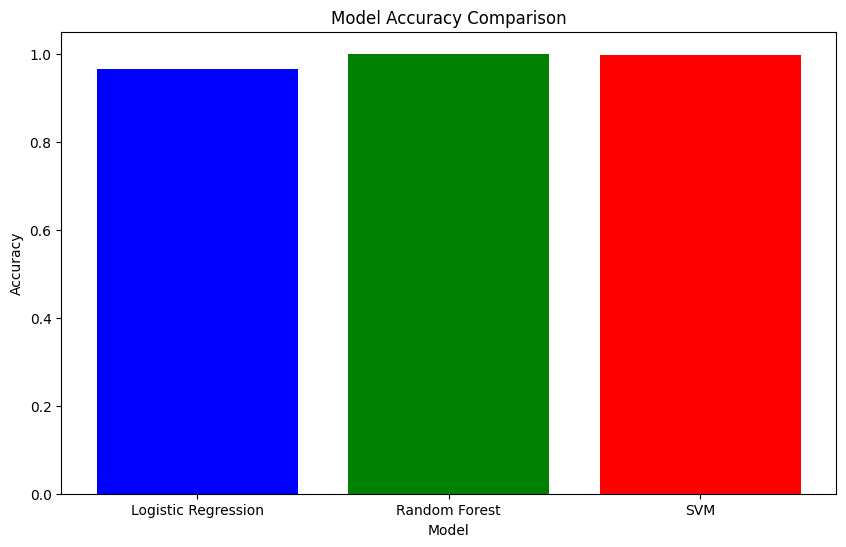

In [43]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
accuracies = [metrics['Accuracy'] for metrics in results.values()]
model_names = list(results.keys())
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

## Logistic Regression with pytorch

Training Logistic Regression with PyTorch...
Epoch [10/100], Loss: 0.6583
Epoch [20/100], Loss: 0.6159
Epoch [30/100], Loss: 0.5787
Epoch [40/100], Loss: 0.5466
Epoch [50/100], Loss: 0.5190
Epoch [60/100], Loss: 0.4952
Epoch [70/100], Loss: 0.4745
Epoch [80/100], Loss: 0.4565
Epoch [90/100], Loss: 0.4406
Epoch [100/100], Loss: 0.4265

Evaluation Metrics:
Accuracy: 0.8878
Precision: 0.9685
Recall: 0.8017
F1-Score: 0.8772
ROC-AUC: 0.9076


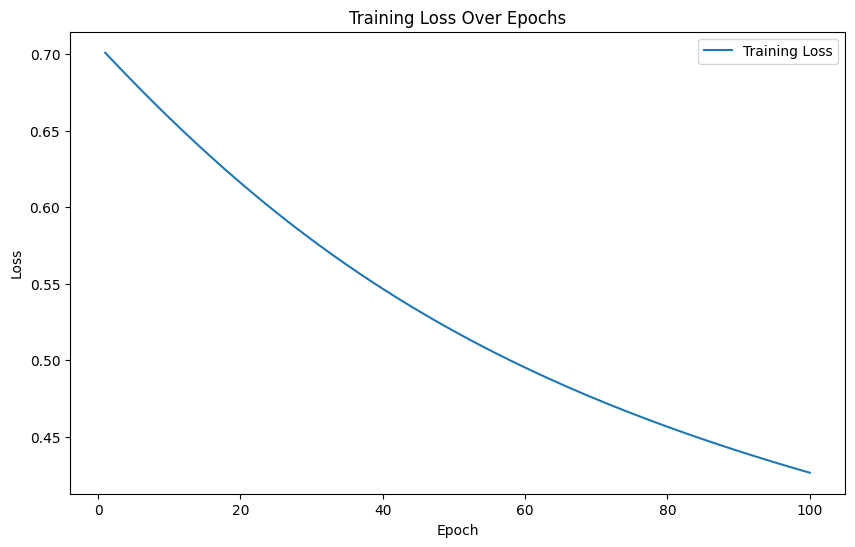

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_res.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res.values, dtype=torch.float32).view(-1, 1)  # Reshape to (n_samples, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Step 2: Define the Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single output node for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

# Initialize the model
input_dim = X_train_tensor.shape[1]  # Number of features
model = LogisticRegressionModel(input_dim)

# Step 3: Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Step 4: Train the model
epochs = 100  # Number of training iterations
losses = []  # To store loss values for plotting

print("Training Logistic Regression with PyTorch...")
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store loss for plotting
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 5: Evaluate the model
with torch.no_grad():  # Disable gradient computation for evaluation
    # Predict on test data
    y_pred_prob = model(X_test_tensor).numpy()  # Get probabilities
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred)
    precision = precision_score(y_test_tensor.numpy(), y_pred)
    recall = recall_score(y_test_tensor.numpy(), y_pred)
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    roc_auc = roc_auc_score(y_test_tensor.numpy(), y_pred_prob)

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Step 6: Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Trying with other variations of the hyperparameters

In [54]:
!pip install ptflops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli


Training with configuration: Adam lr=0.001

MACs for Adam lr=0.001: 30 Mac, Params: 30

Results for Adam lr=0.001:
Accuracy: 0.9091
Precision: 0.9879
Recall: 0.8283
F1-Score: 0.9011
ROC-AUC: 0.9628


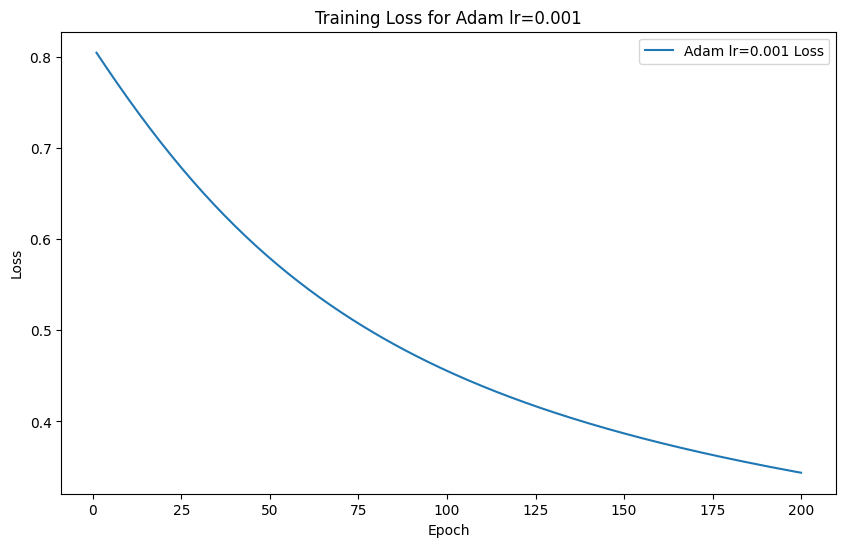


Training with configuration: Adam lr=0.01

MACs for Adam lr=0.01: 30 Mac, Params: 30

Results for Adam lr=0.01:
Accuracy: 0.9508
Precision: 0.9849
Recall: 0.9157
F1-Score: 0.9491
ROC-AUC: 0.9898


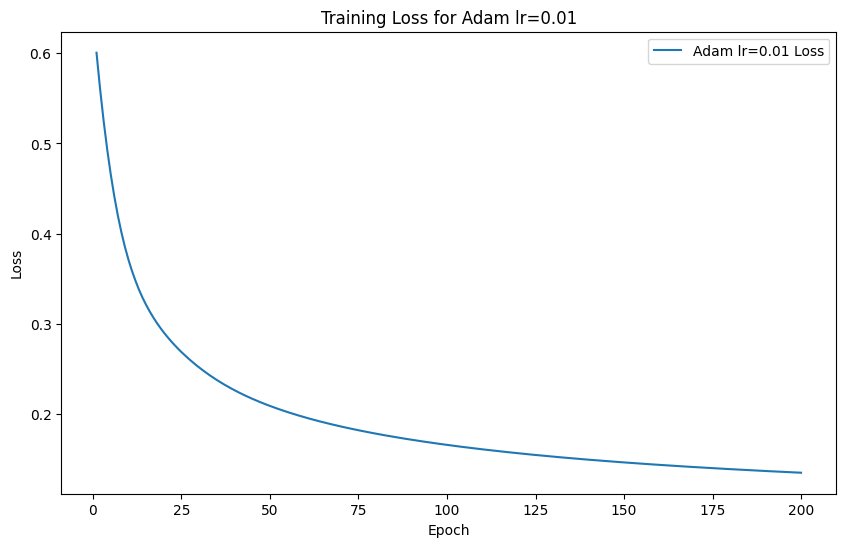


Training with configuration: Adam with Weight Decay

MACs for Adam with Weight Decay: 30 Mac, Params: 30

Results for Adam with Weight Decay:
Accuracy: 0.8969
Precision: 0.9954
Recall: 0.7976
F1-Score: 0.8856
ROC-AUC: 0.9411


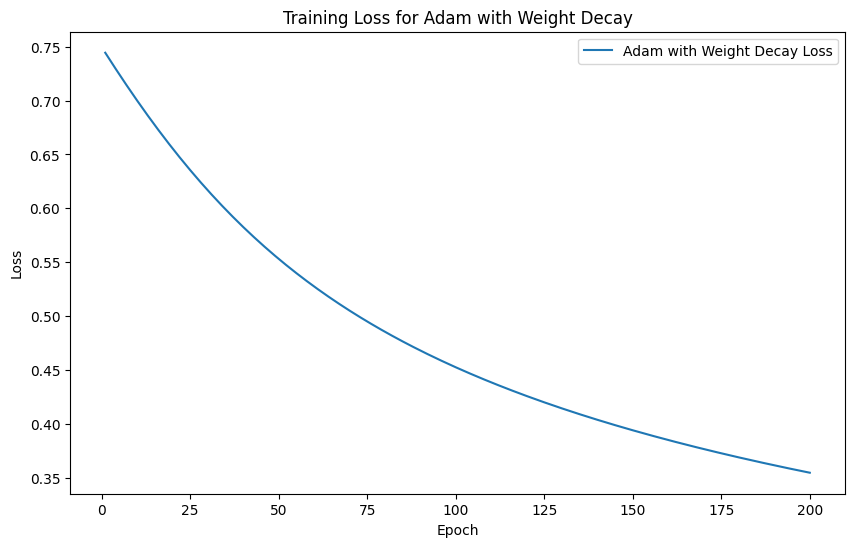


Training with configuration: SGD lr=0.001

MACs for SGD lr=0.001: 30 Mac, Params: 30

Results for SGD lr=0.001:
Accuracy: 0.9171
Precision: 0.9979
Recall: 0.8359
F1-Score: 0.9097
ROC-AUC: 0.9787


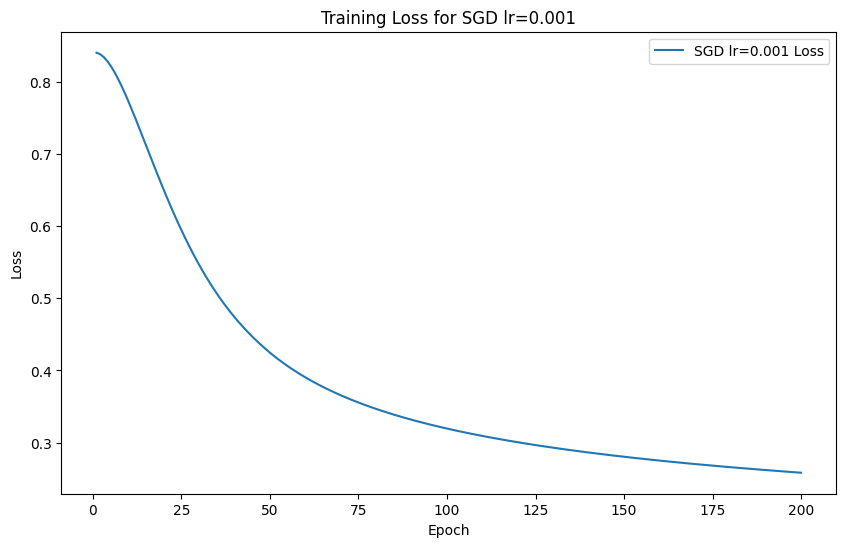


Training with configuration: SGD lr=0.01

MACs for SGD lr=0.01: 30 Mac, Params: 30

Results for SGD lr=0.01:
Accuracy: 0.9478
Precision: 0.9884
Recall: 0.9063
F1-Score: 0.9456
ROC-AUC: 0.9896


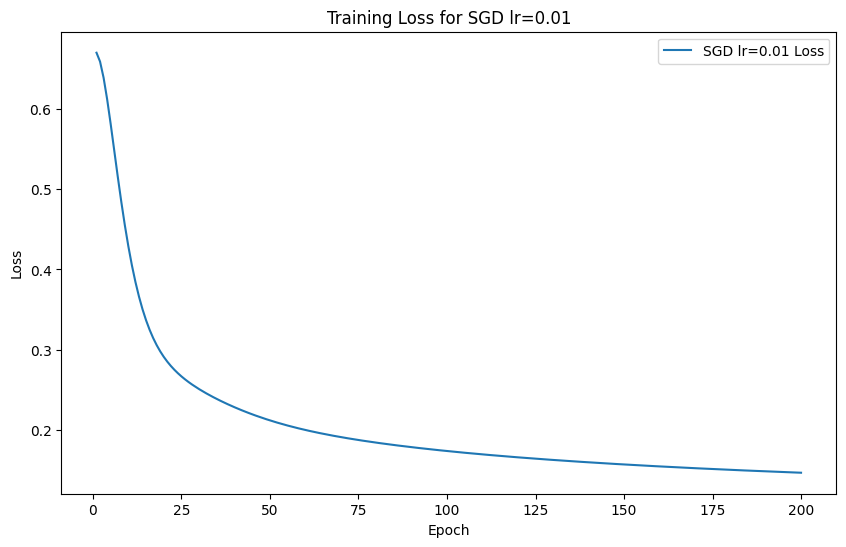


Training with configuration: SGD lr=0.05

MACs for SGD lr=0.05: 30 Mac, Params: 30

Results for SGD lr=0.05:
Accuracy: 0.9565
Precision: 0.9830
Recall: 0.9291
F1-Score: 0.9553
ROC-AUC: 0.9915


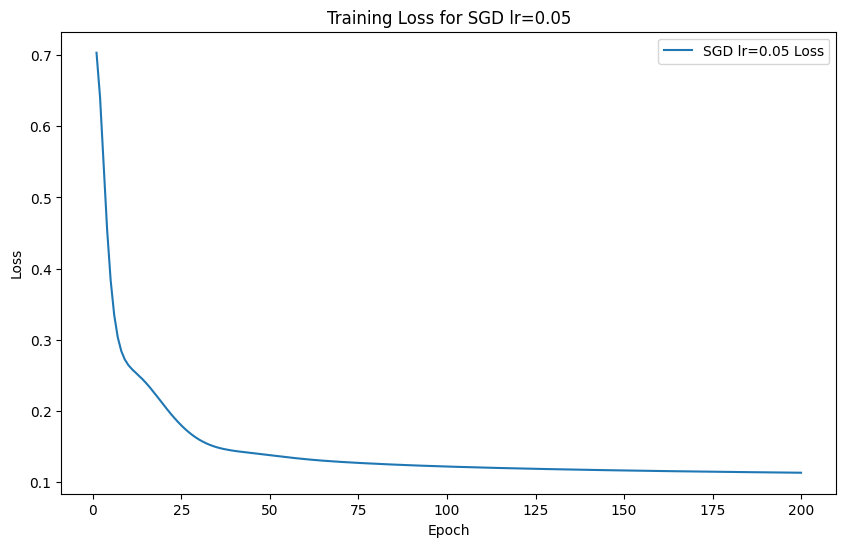


Training with configuration: SGD lr=0.1

MACs for SGD lr=0.1: 30 Mac, Params: 30

Results for SGD lr=0.1:
Accuracy: 0.9590
Precision: 0.9829
Recall: 0.9342
F1-Score: 0.9579
ROC-AUC: 0.9921


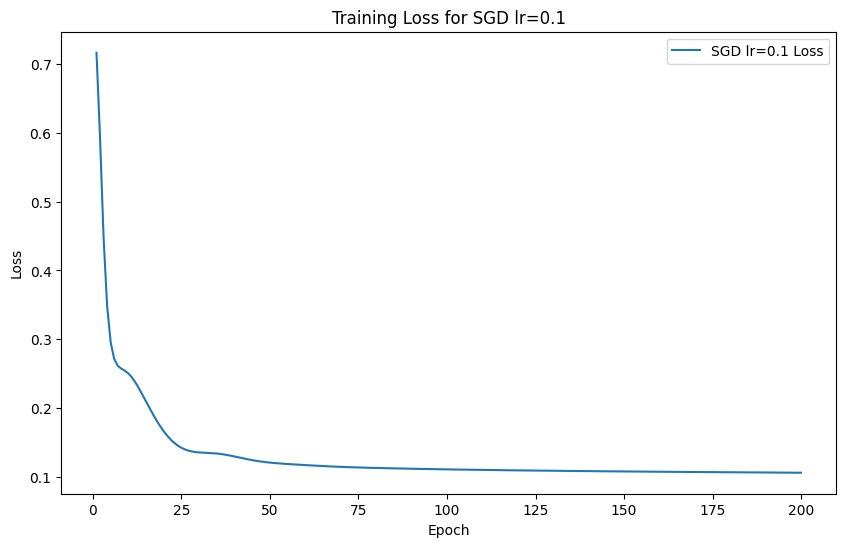

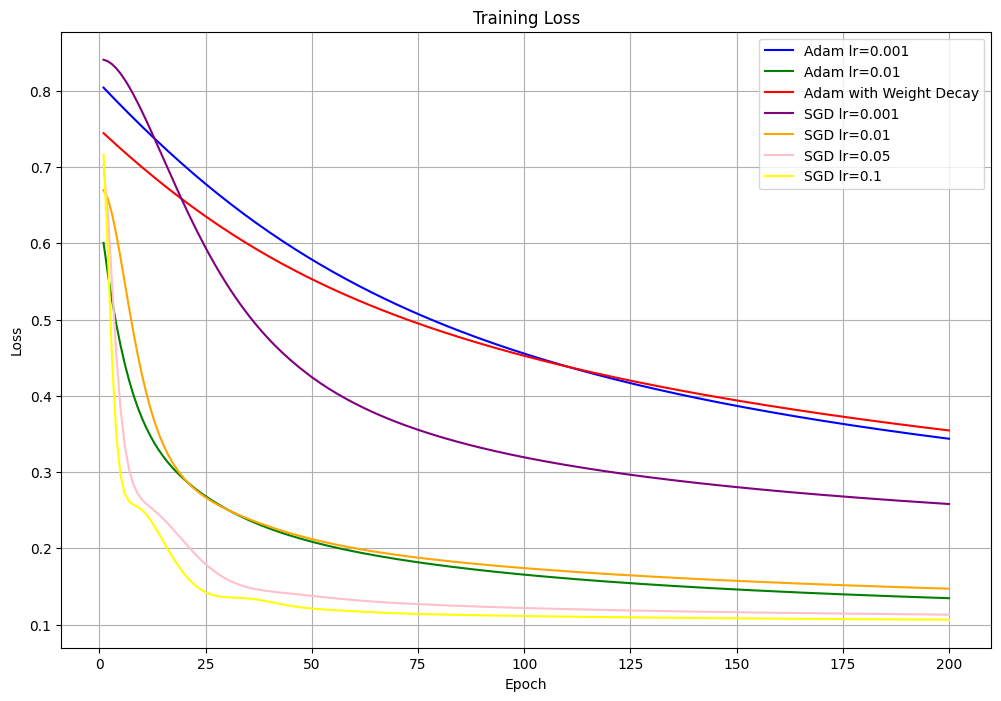

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from ptflops import get_model_complexity_info
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

def train_and_evaluate(config, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor):
    # Initialize model
    model = LogisticRegressionModel(input_dim=X_train_tensor.shape[1])
    # MACs
    macs, params = get_model_complexity_info(model, (1, X_train_tensor.shape[1]), as_strings=True, print_per_layer_stat=False)
    print(f"\nMACs for {config['name']}: {macs}, Params: {params}")

    # loss and optimizer
    criterion = nn.BCELoss()
    if config['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9, weight_decay=config['weight_decay'])

    # Train the model
    losses = []
    for epoch in range(config['epochs']):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Evaluate the model
    with torch.no_grad():
        y_pred_prob = model(X_test_tensor).numpy()
        y_pred = (y_pred_prob > 0.5).astype(int)

        accuracy = accuracy_score(y_test_tensor.numpy(), y_pred)
        precision = precision_score(y_test_tensor.numpy(), y_pred)
        recall = recall_score(y_test_tensor.numpy(), y_pred)
        f1 = f1_score(y_test_tensor.numpy(), y_pred)
        roc_auc = roc_auc_score(y_test_tensor.numpy(), y_pred_prob)

    # Print results
    print(f"\nResults for {config['name']}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    return losses

# hyperparameter variations
hyperparameter_configs = [
    {
        'name': 'Adam lr=0.001',
        'optimizer': 'Adam',
        'lr': 0.001,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'Adam lr=0.01',
        'optimizer': 'Adam',
        'lr': 0.01,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'Adam with Weight Decay',
        'optimizer': 'Adam',
        'lr': 0.001,
        'weight_decay': 0.01,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.001',
        'optimizer': 'SGD',
        'lr': 0.001,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.01',
        'optimizer': 'SGD',
        'lr': 0.01,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.05',
        'optimizer': 'SGD',
        'lr': 0.05,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.1',
        'optimizer': 'SGD',
        'lr': 0.1,
        'weight_decay': 0.0,
        'epochs': 200
    }
]

all_losses = []
config_names = []
# Train and evaluate each one
for config in hyperparameter_configs:
    print(f"\nTraining with configuration: {config['name']}")
    losses = train_and_evaluate(config, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    all_losses.append(losses)
    config_names.append(config['name'])

    # Plot the loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, config['epochs'] + 1), losses, label=f"{config['name']} Loss")
    plt.title(f"Training Loss for {config['name']}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot all loss curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'yellow']

for i, losses in enumerate(all_losses):
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label=config_names[i], color=colors[i])

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Choose Adam with lr=0.01


*   smooth convergence = more robust and less sensitive
*   smooth updates = consistent performance

*   better generalization







